<h1>Random Forest Regression</h1>

<h3>Libraries</h3>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

<h3>Data</h3>

In [47]:
df = pd.read_csv("Data.csv")
df_infos = df.iloc[:,1:-1].values
df_results = df.iloc[:,-1].values 

<h3>Model</h3>

In [48]:
regressor = RandomForestRegressor()

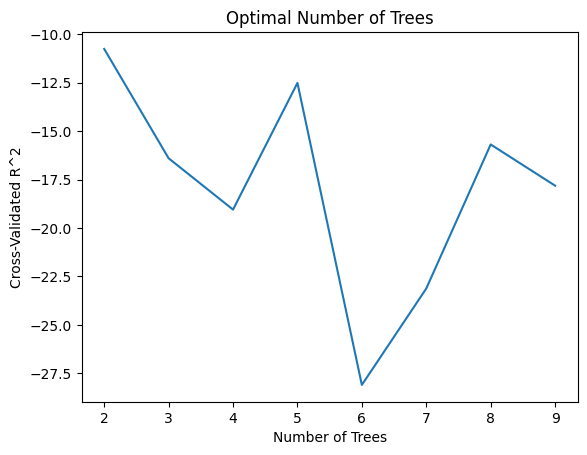

In [49]:
n_estimators_range = range(2, 10, 1)  
mean_scores = []

for n in n_estimators_range:
    regressor.set_params(n_estimators=n)
    scores = cross_val_score(regressor, df_infos, df_results, cv=5)  # X and y are your features and target
    mean_scores.append(scores.mean())

plt.plot(n_estimators_range, mean_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy' if regressor.__class__.__name__ == 'RandomForestClassifier' else 'Cross-Validated R^2')
plt.title('Optimal Number of Trees')
plt.show()


In [50]:
optimal_n = n_estimators_range[mean_scores.index(max(mean_scores))]
print(f'Optimal number of trees: {optimal_n}')

Optimal number of trees: 2


In [51]:
regressor = RandomForestRegressor(n_estimators=optimal_n,random_state=0)
regressor.fit(df_infos,df_results)

RandomForestRegressor(n_estimators=2, random_state=0)

In [52]:
infos_grid = np.arange(min(df_infos), max(df_infos), 0.1)
infos_grid = infos_grid.reshape((len(infos_grid),1))
df_pred = regressor.predict(infos_grid)

C:\Users\joaop\AppData\Local\Temp\ipykernel_27100\2573284980.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  infos_grid = np.arange(min(df_infos), max(df_infos), 0.1)


<h3>Visualizing</h3>

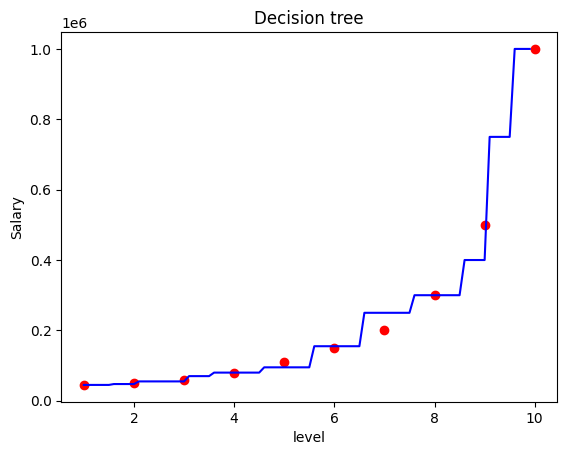

In [53]:
plt.scatter(df_infos,df_results, color = "red", label = "Data")
plt.plot(infos_grid, df_pred, color = "blue", label = "results")
plt.title("Decision tree")
plt.xlabel("level")
plt.ylabel("Salary")
plt.show()

In [54]:
regressor.predict([[4]])

array([80000.])